"""
Monte Carlo Simulation using Metropolis Algorithm for Internal Energy Estimation

This code implements the Metropolis algorithm to estimate the internal energy as a function 
of temperature for a one-dimensional system with Hamiltonian:

H(x,p) = p²/2m + 0.5k(x-1)³

System parameters:
- Position confined to x ∈ [-5, 5]
- Temperature range: T ∈ [0, 10] units
- Mass: m = 1
- Spring constant: k = 1

The Metropolis algorithm samples the canonical ensemble to compute thermal averages
and estimate the internal energy U(T) = <H> at different temperatures.
Calculate the mean position value at temperature T = 0.5
"""

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [78]:
m = 1
k = 1
xmin = -5
xmax = 5


In [87]:
def hamiltonian(x, p):
    return (p**2) / (2 * m) + 0.5 * k * (x - 1)**3


In [88]:
def metropolis_step(x, p, T):
    # Propose 
    x_new = x + random.uniform(-0.5, 0.5)
    p_new = p + random.uniform(-0.5, 0.5)
    #reject out of bounds
    if x_new < xmin or x_new > xmax:
        return x, p, 1  # 1 = REJECT
    # Calculate energy difference
    delta_H = hamiltonian(x_new, p_new) - hamiltonian(x, p)
    # Metropolis acceptance criterion (Boltzmann)
    if delta_H < 0 or random.uniform(0, 1) < math.exp(-delta_H / T):
        return x_new, p_new, 0  # Accept move
    else:
        return x, p, 1  # Reject move


In [96]:
def run_simulation(T, n_steps):
    #Initialization
    x = random.uniform(xmin, xmax)
    p = random.uniform(-5, 5)
    for _ in range(n_burnin):
        x, p, _ = metropolis_step(x, p, T)
    #Data collection
    energies = []
    positions = []
    rej = 0
    #Metropolis sampling
    for _ in range(n_steps):
        x, p, r = metropolis_step(x, p, T)
        rej += r
        energies.append(hamiltonian(x, p))
        positions.append(x)
    mean_E = np.mean(energies)
    mean_x = np.mean(positions)
    rej_rate = rej*100 / n_steps
    return mean_E, mean_x, rej_rate


In [104]:
#Setup of the simulation
n_steps = int(10e5)
n_burnin = int(10e4)
energies = []
positions = []
temperature = np.linspace(0.1, 10, 100)
internal_energy = []
rej = 0

In [105]:
# Evaluating the simulation in temperature range
for T in temperature:
    U, x_avg, rej_rate = run_simulation(T, n_steps)
    internal_energy.append(U)
    energies.append(U)
    positions.append(x_avg)
    rej += rej_rate
    print(f"T={T:.4f}, U={U:.4f}, <x>={x_avg:.4f}, Rej Rate={rej_rate:.4f}%")  

T=0.1000, U=-107.8527, <x>=-4.9982, Rej Rate=99.6861%
T=0.2000, U=-107.7004, <x>=-4.9963, Rej Rate=99.3186%
T=0.3000, U=-107.5522, <x>=-4.9945, Rej Rate=98.9441%
T=0.4000, U=-107.3990, <x>=-4.9925, Rej Rate=98.5622%
T=0.5000, U=-107.2472, <x>=-4.9907, Rej Rate=98.2198%
T=0.6000, U=-107.1045, <x>=-4.9888, Rej Rate=97.8448%
T=0.7000, U=-106.9342, <x>=-4.9868, Rej Rate=97.4406%
T=0.8000, U=-106.7767, <x>=-4.9849, Rej Rate=97.0643%
T=0.9000, U=-106.6434, <x>=-4.9831, Rej Rate=96.6862%
T=1.0000, U=-106.4748, <x>=-4.9813, Rej Rate=96.2687%
T=1.1000, U=-106.3614, <x>=-4.9795, Rej Rate=95.9548%
T=1.2000, U=-106.1789, <x>=-4.9773, Rej Rate=95.5639%
T=1.3000, U=-106.0314, <x>=-4.9754, Rej Rate=95.1519%
T=1.4000, U=-105.8314, <x>=-4.9734, Rej Rate=94.7218%
T=1.5000, U=-105.7364, <x>=-4.9719, Rej Rate=94.4452%
T=1.6000, U=-105.6340, <x>=-4.9698, Rej Rate=94.0574%
T=1.7000, U=-105.3926, <x>=-4.9676, Rej Rate=93.5908%
T=1.8000, U=-105.2732, <x>=-4.9658, Rej Rate=93.2533%
T=1.9000, U=-105.1523, <x>=-

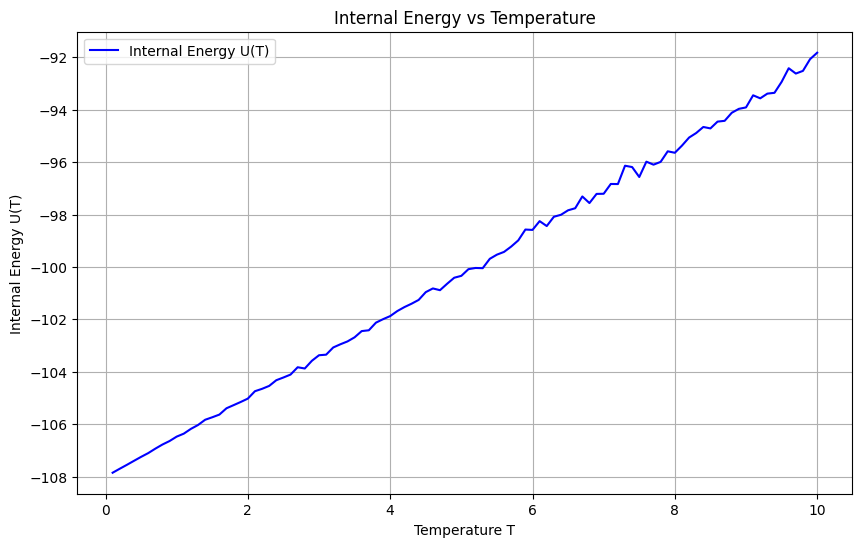

In [106]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(temperature, internal_energy, label='Internal Energy U(T)', color='blue')
plt.title('Internal Energy vs Temperature')
plt.xlabel('Temperature T')
plt.ylabel('Internal Energy U(T)')
plt.legend()
plt.grid()
plt.show()

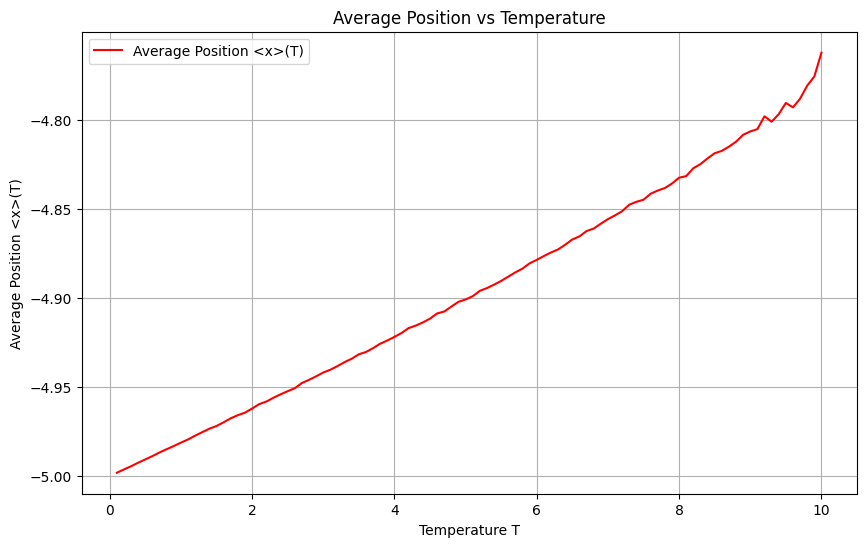

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(temperature, positions, label='Average Position <x>(T)', color='red')
plt.title('Average Position vs Temperature')
plt.xlabel('Temperature T')
plt.ylabel('Average Position <x>(T)')
plt.legend()
plt.grid()
plt.show()

In [108]:
# avarage values of  T = 0.5
T_5 = 0.5
# Run the simulation 
U, x_avg, rej_rate = run_simulation(T_5, 5_000)
print("T =", T_5)
print("<x> =", x_avg)
print("rechazos (%) =", rej_rate)


T = 0.5
<x> = -4.991459725984334
rechazos (%) = 98.3
